In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad, tplquad, dblquad
from scipy.special import roots_legendre


# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Ana Sofia Del Rio
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






In [ ]:
#Para la primera función
a1, b1= 0, np.pi/4
f1= lambda x: np.exp(3*x)*np.sin(x)
n = 8
h1 = (b1 - a1)/n
x = np.arange(a1, b1+h1, h1)
y = f1(x)
valor_real1, _ = quad(f1, a1, b1)

int_simp = simpson(y, x)
int_trap = trapezoid(y, x)
print(f'La integral usando el método de simpson es: {int_simp}')
print(f'La integral usando el método trapezoidal es: {int_trap}')

#Para la segunda función
a2, b2= np.e, 1+np.e
f2= lambda x: 1/(x*np.log(x))
n = 8
h2 = (b2 - a2)/n
x = np.arange(a2, b2+h2, h2)
y = f2(x)
valor_real2, _ = quad(f2, a2, b2)

int_simp = simpson(y, x)
int_trap = trapezoid(y, x)
print(f'La integral usando el método de simpson es: {int_simp}')
print(f'La integral usando el método trapezoidal es: {int_trap}')



La integral usando el método de simpson es: 1.5922525473734614
La integral usando el método trapezoidal es: 1.6152243494606995
La integral usando el método de simpson es: 0.27251460988286325
La integral usando el método trapezoidal es: 0.2727398104561005


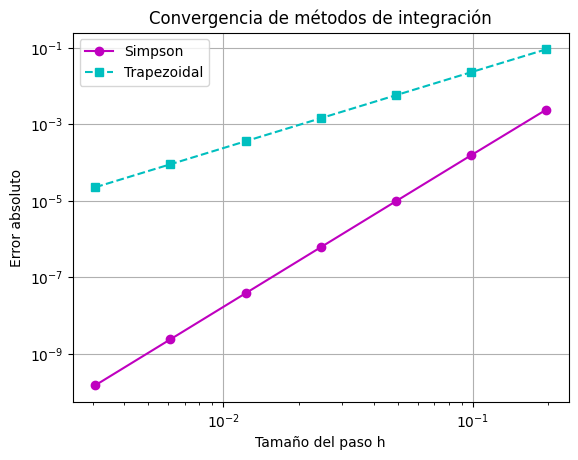

In [ ]:
#Evaluamos la convergencia en función de h
#Para la función 1
nvals = 2 ** np.arange(2, 9) #simpson necesita que sea par
h_= []
error_simp= []
error_trap= []

for n in nvals:
    h= (b1- a1)/n
    x = np.linspace(a1, b1, n+1)
    y= f1(x)

    int_simp= simpson(y, x)
    int_trap= trapezoid(y, x)

    err_simp= abs(valor_real1 - int_simp)
    err_trap= abs(valor_real1 - int_trap)

    h_.append(h)
    error_simp.append(err_simp)
    error_trap.append(err_trap)

plt.loglog(h_, error_simp, 'mo-', label='Simpson')
plt.loglog(h_, error_trap, 'cs--', label='Trapezoidal')
plt.xlabel('Tamaño del paso h')
plt.ylabel('Error absoluto')
plt.title('Convergencia de métodos de integración')
plt.legend()
plt.grid()
plt.show()

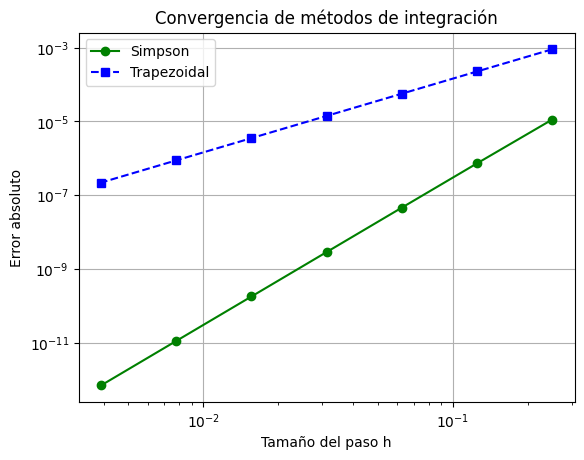

In [ ]:
#Para la función 2
nvals = 2 ** np.arange(2, 9) #simpson necesita que sea par
h_= []
error_simp= []
error_trap= []

for n in nvals:
    h= (b2- a2)/n
    x = np.linspace(a2, b2, n+1)
    y= f2(x)

    int_simp= simpson(y, x)
    int_trap= trapezoid(y, x)

    err_simp= abs(valor_real2 - int_simp)
    err_trap= abs(valor_real2 - int_trap)

    h_.append(h)
    error_simp.append(err_simp)
    error_trap.append(err_trap)

plt.loglog(h_, error_simp, 'go-', label='Simpson')
plt.loglog(h_, error_trap, 'bs--', label='Trapezoidal')
plt.xlabel('Tamaño del paso h')
plt.ylabel('Error absoluto')
plt.title('Convergencia de métodos de integración')
plt.legend()
plt.grid()
plt.show()

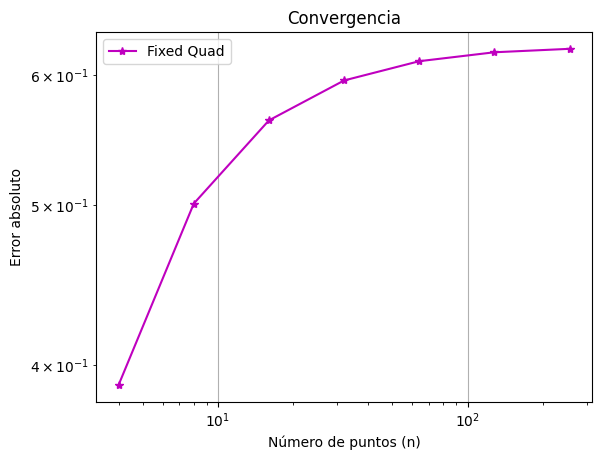

In [ ]:
#Para realizar el estudio de convergencia
#Para la función 1
nvals = 2**np.arange(2, 9)
errorfq1 = []

for n in nvals:
    resultado, _ = fixed_quad(f1, a1, b1, n=n)
    error = abs(valor_real1 - resultado)
    errorfq1.append(error)

plt.loglog(nvals, errorfq1, 'm*-', label='Fixed Quad')
plt.xlabel('Número de puntos (n)')
plt.ylabel('Error absoluto')
plt.title('Convergencia')
plt.grid()
plt.legend()
plt.show()

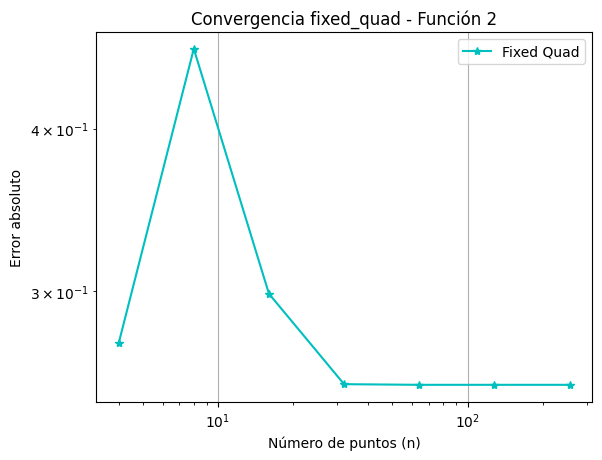

In [ ]:
#Para la función 2
errorfq2 = []

for n in nvals:
    resultado, _ = fixed_quad(f2, a2, b2, n=n)
    error = abs(valor_real2 - resultado)
    errorfq2.append(error)

plt.loglog(nvals, errorfq2, 'c*-', label='Fixed Quad')
plt.xlabel('Número de puntos (n)')
plt.ylabel('Error absoluto')
plt.title('Convergencia fixed_quad - Función 2')
plt.grid()
plt.legend()
plt.show()

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [ ]:
def integral_interna(y, x):
  integrando = lambda z: 1/y*np.sin(z/y)
  resultado, _ = quad(integrando, 0, x*y)
  return resultado

def integral_intermedia(x):
  integrando = lambda y: integral_interna(y, x)
  resultado, _ = quad(integrando, 0, x)
  return resultado

resultado_int3_quad, error= quad(integral_intermedia, 0, np.pi)
print(f'La integral triple usando quad es: {resultado_int3_quad}')

f_triple = lambda z, y, x: 1/y*np.sin(z/y)
resultado_int3_tplquad, error = tplquad(f_triple, 0, np.pi, lambda x: 0, lambda x: x, lambda x, y: 0, lambda x, y: x*y)
print(f'La integral triple usando tplquad es: {resultado_int3_tplquad}')
error = abs(resultado_int3_quad - resultado_int3_tplquad)
print(f'El error es: {error}')

La integral triple usando quad es: 6.934802200544679
La integral triple usando tplquad es: 6.934802200544679
El error es: 0.0


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





Vamos a utilizar la dormula de cambio de variable para poder usar cualquier intervalo de integración en la función.
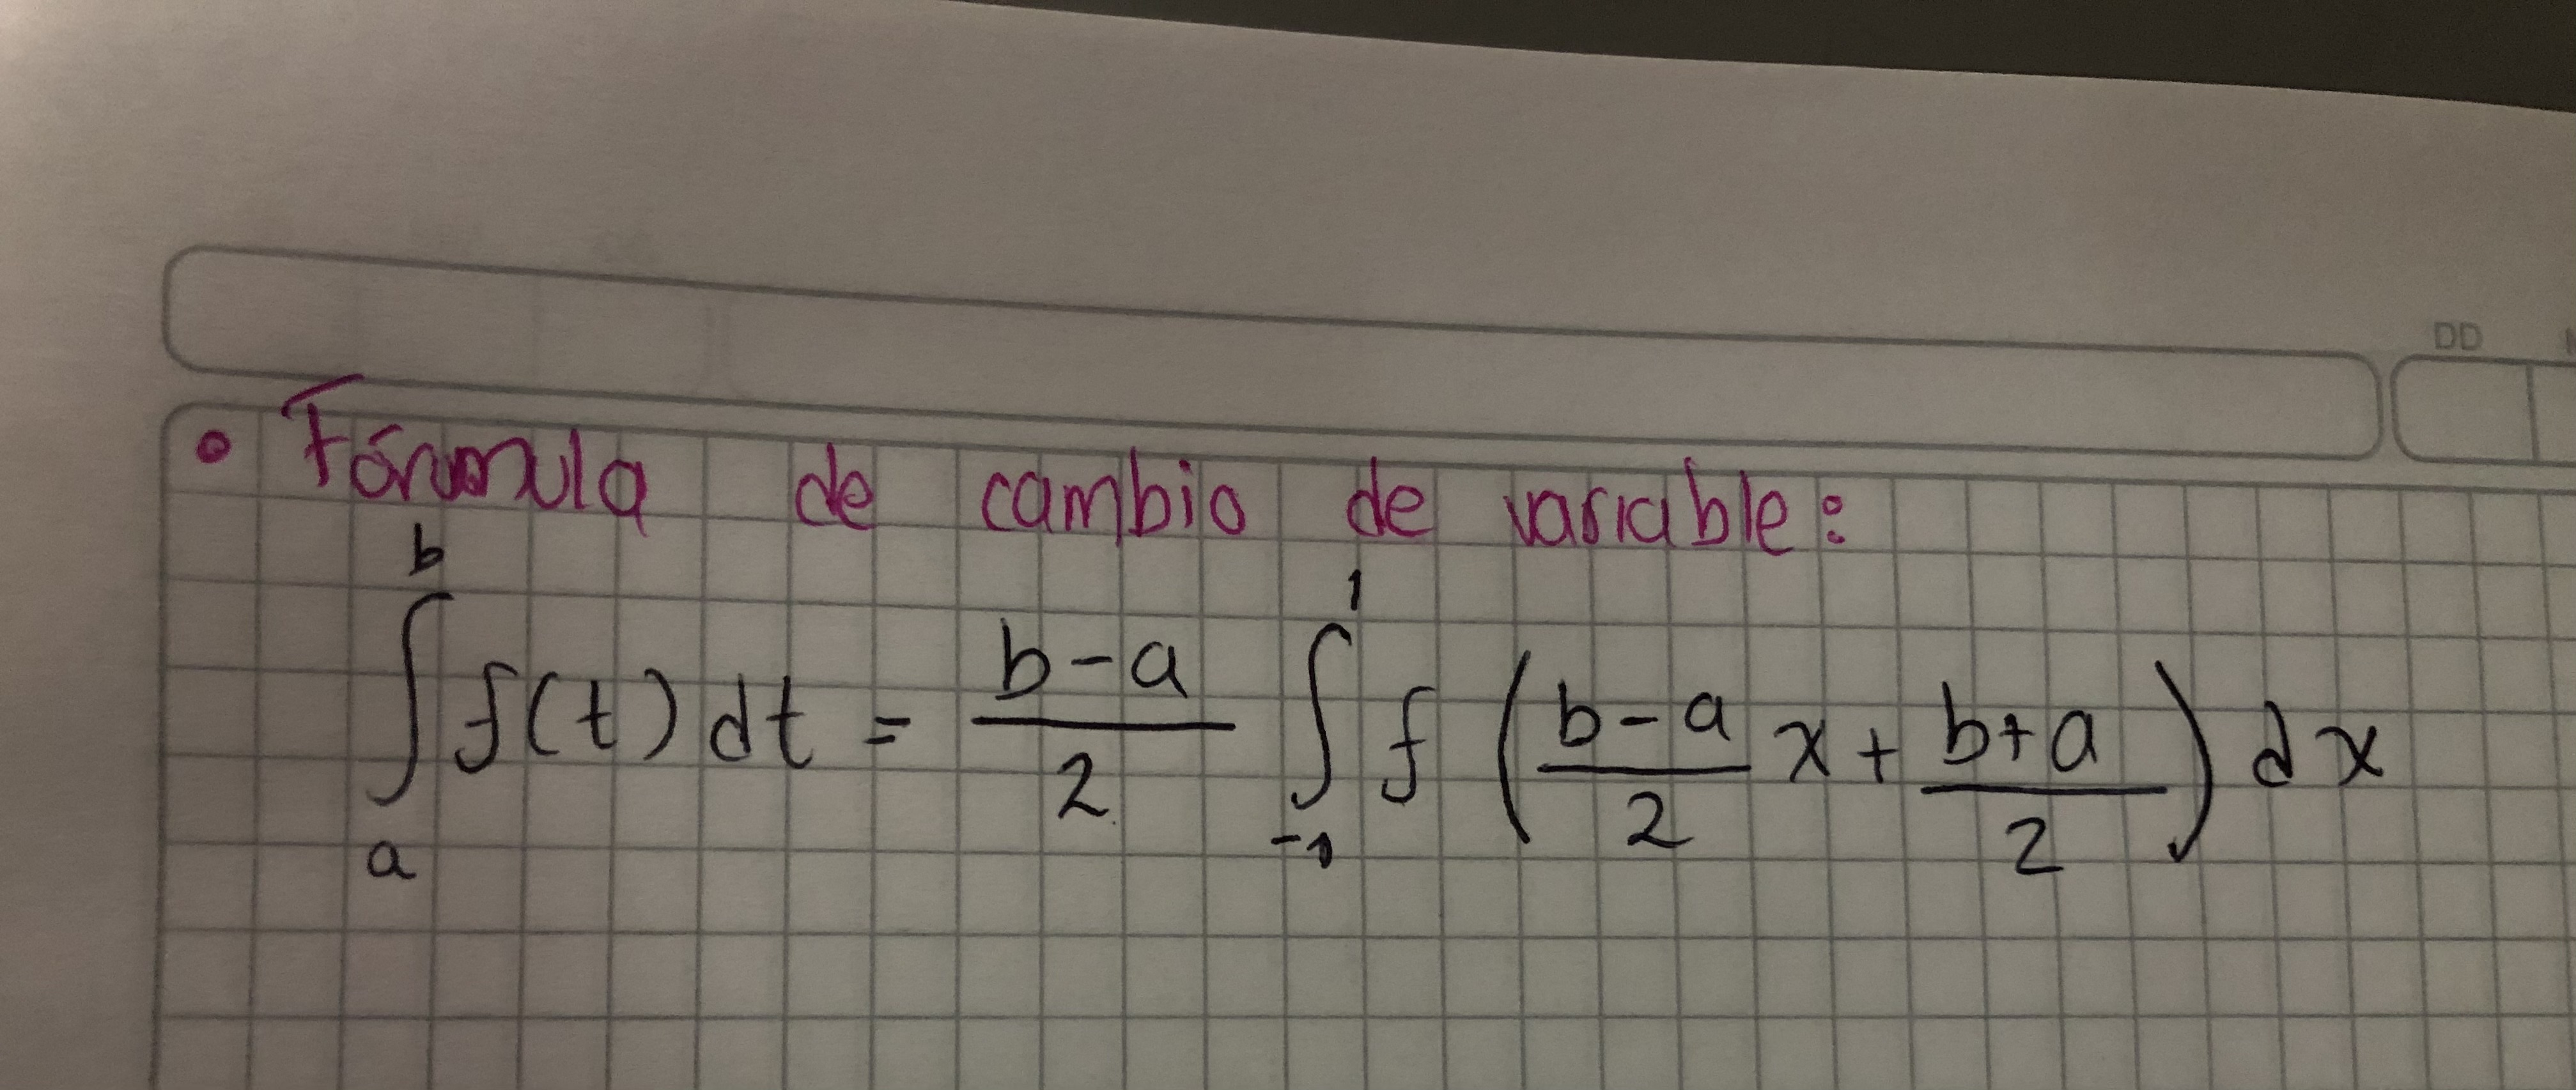

In [ ]:
def gauss_quad_standard_ab(func, a, b,n):
  '''
  Calcula la integral de una función en el intervalo [a, b]
  usando cuadratura gaussiana.

  Entradas:
  - a, b intervalos de integración
  - func: La función a integrar
  - n: Número de puntos para la cuadratura (grado del polinomio de Legendre)

  Salidas:
  - Aproximación de la integral

  '''
  x, w = roots_legendre(n)
  t =((b-a)/2)*x+(b+a)/2
  integral = ((b-a)/2) * np.sum(w * func(t))
  return integral

In [ ]:
#Calculamos la integral del punto 2

def integral_interna_gauss(y, x, n=100):
  integrando = lambda z: 1/y*np.sin(z/y)
  resultado= gauss_quad_standard_ab(integrando, 0, x*y, n)
  return resultado

def integral_intermedia_gauss(x, n=100):
  integrando = lambda y: integral_interna_gauss(y, x, n)
  resultado = gauss_quad_standard_ab(integrando, 0, x, n)
  return resultado

resultado_int3_gauss= gauss_quad_standard_ab(integral_intermedia_gauss, 0, np.pi, n=100)
print(f'La integral triple usando Gauss es: {resultado_int3_gauss}')


La integral triple usando Gauss es: 9.107331966336812


In [ ]:
def gauss_quad_standard_ab(func, a, b, n):
    x, w = roots_legendre(n)
    t = 0.5 * (b - a) * x + 0.5 * (b + a)
    return 0.5 * (b - a) * np.sum(w * func(t))

# Integral triple
def integral_triple_gauss(n=10):
    def f_x(x):
        def f_y(y):
            def f_z(z):
                return 1/y * np.sin(z / y)
            return gauss_quad_standard_ab(f_z, 0, x * y, n)
        return gauss_quad_standard_ab(f_y, 0, x, n)
    return gauss_quad_standard_ab(f_x, 0, np.pi, n)

resultado = integral_triple_gauss(n=10)
print(f"La integral triple usando Gauss corregida es: {resultado}")

La integral triple usando Gauss corregida es: 9.107331966336744


#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:
#Definimos una función para encontrar con cada método la integral con una tolerancia menor a 1e-5
def int_tol(f, a, b, metodo, epsilon=1e-5):
    n = 10
    anterior = 9999
    if metodo == 'gauss':
      while True:
        actual, _ = fixed_quad(f, a, b, n=n)
        if abs(actual - anterior) < epsilon:
            break
        anterior = actual
        n += 1
    else:
        while True:
          x = np.linspace(a, b, n + 1)
          y = f(x)
          if metodo == 'trapecio':
                actual = trapezoid(y, x)
          elif metodo == 'simpson':
            if n % 2 == 1:
                    n += 1  #Simpson necesita n par
                    continue
            actual = simpson(y, x)
          if abs(actual - anterior) < epsilon:
                break
          anterior = actual
          n *= 2
    return actual, n
#Para la primera integral:
a1, b1 = 1e-5, np.pi/2 - 1e-5
f1 = lambda x: 1/np.sqrt(np.tan(x))
res1_trap, n1t = int_tol(f1, a1, b1, 'trapecio')
res1_simp, n1s = int_tol(f1, a1, b1, 'simpson')
res1_gauss, n1g = int_tol(f1, a1, b1, 'gauss')
print('Primera integral')
print(f'-La integral usando el método de simpson es: {res1_simp} y n= {n1t}')
print(f'-La integral usando el método trapezoidal es: {res1_trap} y n= {n1s}')
print(f'-La integral usando el método gaussiano es: {res1_gauss} y n= {n1g}')

#Para la segunda integral:
a2, b2 = 1, 100
f2 = lambda x: np.cos(x)/x**3
res2_trap, n2t = int_tol(f2, a2, b2, 'trapecio')
res2_simp, n2s = int_tol(f2, a2, b2, 'simpson')
res2_gauss, n2g = int_tol(f2, a2, b2, 'gauss')

print('Segunda integral')
print(f'-La integral usando el método de simpson es: {res2_simp} y n= {n2t}')
print(f'-La integral usando el método trapezoidal es: {res2_trap} y n= {n2s}')
print(f'-La integral usando el método gaussiano es: {res2_gauss} y n= {n2g}')

#Para la tercera integral:
f_doble = lambda x, y: 1/np.sqrt(1-y**2)
res3, error = dblquad(f_doble, 0, np.pi/4, lambda x: 0, lambda x: np.sin(x), epsabs=1e-5)
print('Tercera integral')
print(f'-La integral doble es: {res3}')


Primera integral
-La integral usando el método de simpson es: 2.2151169915748743 y n= 1310720
-La integral usando el método trapezoidal es: 2.215118783301709 y n= 655360
-La integral usando el método gaussiano es: 2.214299574519214 y n= 243
Segunda integral
-La integral usando el método de simpson es: 0.01811713458860586 y n= 40960
-La integral usando el método trapezoidal es: 0.01811828913739534 y n= 5120
-La integral usando el método gaussiano es: 0.01809891210662214 y n= 40
Tercera integral
-La integral doble es: 0.36033449485443175
